<a href="https://colab.research.google.com/github/Adriana0224/Proyecto-sobre-factores-socioecon-micos-e-ingresos/blob/main/Project_on_Socioeconomic_Factors_and_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Factores socioeconomicos que afectan en los ingreso de las personas**

## **Introducción**
Vivimos en un mundo donde las condiciones sociales y económicas influyen directamente en la calidad de vida de las personas. Factores como el nivel educativo, el tipo de empleo, el entorno familiar, e incluso el lugar donde se nace, pueden marcar una diferencia significativa en los ingresos que una persona puede alcanzar a lo largo de su vida. Este proyecto nace con la intención de analizar cómo distintos factores socioeconómicos impactan en los niveles de ingreso. A partir de un conjunto de datos estructurado, se realiza un estudio exploratorio y analítico que busca responder preguntas clave:

¿Tienen los niveles educativos un efecto directo sobre el ingreso?

¿Existen brechas significativas según el género o el lugar de residencia?

¿Qué variables tienen mayor peso al predecir el ingreso de una persona?

## **El conjunto de datos incluye las siguientes columnas:**
ID: Identificador único para cada individuo

Sexo: Codificado como 1 (Mujeres) y 0 (Hombres)

Estado Civil: Clasificado como soltero/a o no soltero/a (divorciado/separado/casado/viudo)

Edad: Edad del individuo

Educación: Nivel educativo alcanzado (por ejemplo, secundaria, universidad)

Ingresos: Ingreso anual en unidades monetarias

Ocupación: Clasificación del trabajo (por ejemplo, empleado calificado, desempleado)

Tamaño del Asentamiento: Clasificación del área residencial (posiblemente urbana o rural)

## **Objetivos**
- Examinar la influencia de factores como:Nivel educativo, Tipo de ocupación, Género, Edad, Ubicación geográfica.

- Detectar desigualdades o brechas salariales entre distintos grupos socioeconómicos.

- Visualizar los patrones encontrados mediante gráficos y mapas que faciliten la interpretación de los resultados.

- Proporcionar recomendaciones o hallazgos que puedan ser útiles para la toma de decisiones en políticas públicas, programas sociales o investigaciones académicas.

### **Importamos las librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Cargamos la base de datos y observamos las primeras filas**

In [3]:
df = pd.read_csv("factores socioeconomic.csv")
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,single,67,university,124670,skilled employee / official,2
1,100000002,1,non-single (divorced / separated / married / w...,22,high school,150773,skilled employee / official,2
2,100000003,0,single,49,high school,89210,unemployed / unskilled,0
3,100000004,0,single,45,high school,171565,skilled employee / official,1
4,100000005,0,single,53,high school,149031,skilled employee / official,1


In [4]:
# Observamos la ultimas filas
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,single,47,high school,123525,unemployed / unskilled,0
1996,100001997,1,non-single (divorced / separated / married / w...,27,high school,117744,skilled employee / official,0
1997,100001998,0,single,31,other / unknown,86400,unemployed / unskilled,0
1998,100001999,1,non-single (divorced / separated / married / w...,24,high school,97968,unemployed / unskilled,0
1999,100002000,0,single,25,other / unknown,68416,unemployed / unskilled,0


In [5]:
# Exploramos el tipo de dato en cada columna
df.dtypes

,0
ID,int64
Sex,int64
Marital status,object
Age,int64
Education,object
Income,int64
Occupation,object
Settlement size,int64


In [6]:
#Explorar los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               2000 non-null   int64 
 1   Sex              2000 non-null   int64 
 2   Marital status   2000 non-null   object
 3   Age              2000 non-null   int64 
 4   Education        2000 non-null   object
 5   Income           2000 non-null   int64 
 6   Occupation       2000 non-null   object
 7   Settlement size  2000 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 125.1+ KB


In [8]:
# Confirmamos cuantas filas y columnas tiene el dataset
df.shape

(2000, 8)

- la base de datos tiene 2000 filas y 8 columnas.
- 5 columnas son del tipo entero y 3 son categoricas.


In [9]:
# Eliminaremos la columna ID, ya que no aporta informaci[on relevante para el analisis
df.drop(columns=['ID'], inplace=True)

In [10]:
# Verificamos que no existe la columna ID
df.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

In [11]:
df.dtypes

,0
Sex,int64
Marital status,object
Age,int64
Education,object
Income,int64
Occupation,object
Settlement size,int64


Los datos estan listos para su analisis.

# **EDA**

In [14]:
# Veamos si tiene datos nulos
df.isnull().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


El dataset no tiene datos nulos

In [12]:
#Veamos si tiene datos duplicados.
df.duplicated().sum()

np.int64(0)

In [13]:
# Realizaremos un analisis descriptivo con las columnas que tienen datos numericos
df.describe().round(2)

,Sex,Age,Income,Settlement size
count,2000.00,2000.00,2000.00,2000.00
mean,0.46,35.91,120954.42,0.74
std,0.50,11.72,38108.82,0.81
min,0.00,18.00,35832.00,0.00
25%,0.00,27.00,97663.25,0.00
50%,0.00,33.00,115548.50,1.00
75%,1.00,42.00,138072.25,1.00
max,1.00,76.00,309364.00,2.00


In [15]:
#Exploramos los datos categoricos
df.describe(include ="object")

,Marital status,Education,Occupation
count,2000,2000,2000
unique,2,4,3
top,single,high school,skilled employee / official
freq,1007,1386,1113


In [17]:
# Analizamos la columna tamaño de asentamiento, dependiendo del tamaño de la población
df["Settlement size"].value_counts()

,count
Settlement size,
0,989
1,544
2,467


## **Definimos la variables categoricas**

In [18]:
for col in (df.select_dtypes("object").columns.tolist()):
    valores_unicos = df[col].value_counts()
    print(valores_unicos)
    print('\n')

Marital status
single                                                   1007
non-single (divorced / separated / married / widowed)     993
Name: count, dtype: int64


Education
high school        1386
university          291
other / unknown     287
graduate school      36
Name: count, dtype: int64


Occupation
skilled employee / official                                         1113
unemployed / unskilled                                               633
management / self-employed / highly qualified employee / officer     254
Name: count, dtype: int64




In [20]:
# Simplicamos los nombres categoricos de los datos en las columnas ocupación(Occupation),
#estatus marital(Marital status) y educación(Education)

occupation_map = {
    'skilled employee / official': 'Skilled Worker',
    'unemployed / unskilled': 'Unskilled / Unemployed',
    'management / self-employed / highly qualified employee / officer': 'Executive / Self-Employed'
}

# Aplicamos el cambio  a la columna "Ocupación"
df['Occupation'] = df['Occupation'].replace(occupation_map)

marital_status_map = {
    'single': 'Single',
    'non-single (divorced / separated / married / widowed)': 'Non-Single'
}
# Aplicamos el cambio  a la columna "Marital status"
df['Marital status'] = df['Marital status'].replace(marital_status_map)

df["Education"] = df["Education"].replace({"graduate school": "Postgraduate"})

In [21]:
# Observamos los cambios en la columna ocupación(Occupation).
df["Occupation"].value_counts()

,count
Occupation,
Skilled Worker,1113
Unskilled / Unemployed,633
Executive / Self-Employed,254


In [22]:
# Observamos los cambios en la columna estatus marital(Marital status)
df["Marital status"].value_counts()

,count
Marital status,
Single,1007
Non-Single,993


In [24]:
# Observamos los cambios en la columna educación(Education)
df["Education"].value_counts()

,count
Education,
high school,1386
university,291
other / unknown,287
Postgraduate,36


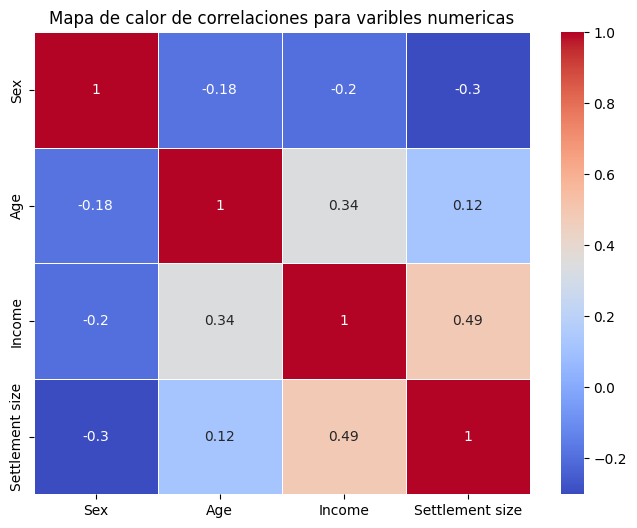

In [25]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", linewidths=0.5, annot = True)
plt.title("Mapa de calor de correlaciones para varibles numericas")
plt.show()


### **Análisis del Mapa de Calor**
 **Income (Ingreso):**

Correlación positiva moderada con Settlement size (0.49), lo que significa que los ingresos tienden a ser más altos en áreas más grandes (urbanas).

Correlación moderada con Age (0.34): las personas mayores tienden a tener ingresos más altos, probablemente por mayor experiencia laboral.

Correlación negativa débil con Sex (-0.2), podría indicar una ligera diferencia de ingresos entre géneros (habría que analizarlo más a fondo).

In [26]:
#Analizaremos los ingresos promedios por nivel de educación
df_educacion = df.groupby("Education")["Income"].mean().round(2).reset_index()
df_educacion

,Education,Income
0,Postgraduate,146818.33
1,high school,116367.72
2,other / unknown,115068.21
3,university,145405.98


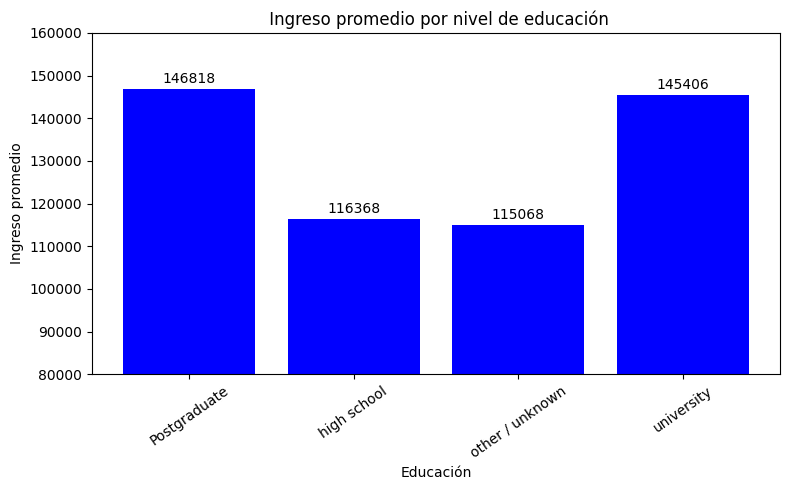

In [27]:
# Grafica los ingresos promedios por nivel de educación

plt.figure(figsize=(8,5))
bars = plt.bar(df_educacion["Education"], df_educacion["Income"], color="blue")

plt.xlabel("Educación")
plt.ylabel("Ingreso promedio")
plt.title(" Ingreso promedio por nivel de educación")

plt.ylim(80000,160000)
plt.bar_label(bars, padding=2)
plt.xticks(rotation=35)

plt.tight_layout()
plt.show()

### **Análisis de ingreso promedio por nivel de educación**
Las personas con posgrado son las que más ganan, con un ingreso promedio cercano a los 146,818.

Le siguen muy de cerca quienes tienen educación universitaria, con un ingreso promedio de 145,406.

En contraste, quienes solo tienen educación secundaria (high school) o otro tipo de formación ganan bastante menos, en torno a los 115,000 - 116,000.

En términos simples, a mayor nivel educativo, mayores ingresos. Este patrón sugiere que la educación superior tiene un impacto real en las oportunidades económicas.

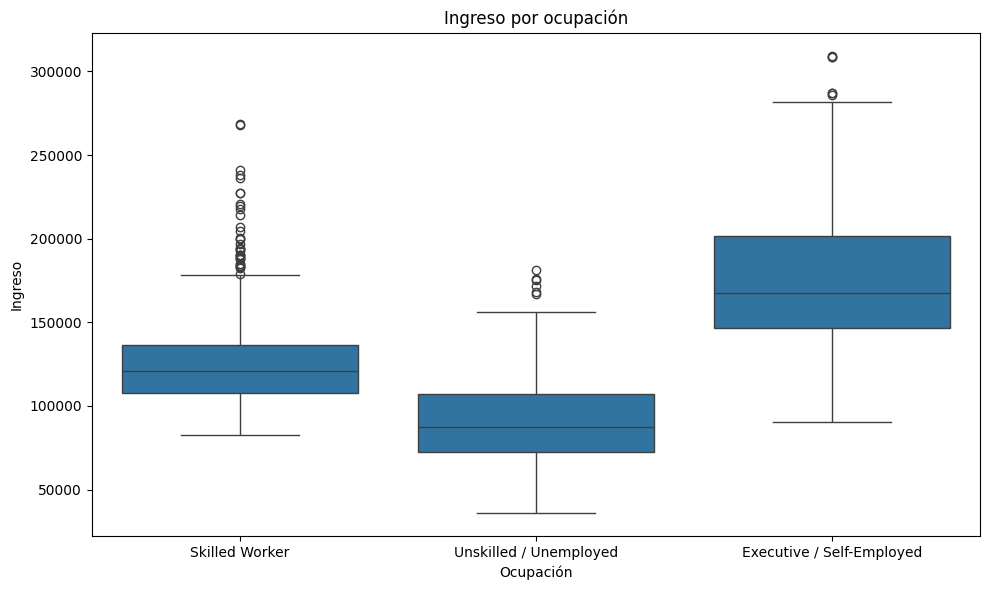

In [28]:
# Grafica los ingresos por ocupación
plt.figure(figsize = (10,6))
sns.boxplot(x ="Occupation", y="Income", data= df)
plt.xlabel("Ocupación")
plt.ylabel("Ingreso")
plt.title("Ingreso por ocupación")

plt.tight_layout()
plt.show()

### **Análisis de ingresos por ocupación**
Executive / Self-Employed (ejecutivos o trabajadores por cuenta propia) son quienes ganan más. No solo tienen el ingreso promedio más alto, sino también una mayor dispersión (algunos ganan muchísimo más que el promedio).

Skilled Workers (trabajadores calificados) tienen ingresos moderados y relativamente estables.

Unskilled / Unemployed (no calificados o desempleados) tienen los ingresos más bajos, con varios casos por debajo de los 80,000.

**- Hay una desigualdad clara según el tipo de ocupación. Las personas con empleos más calificados o que trabajan por su cuenta tienen una ventaja económica significativa. En cambio, los trabajadores no calificados o sin empleo tienen ingresos mucho más bajos.**

In [29]:
#Ingreso promedio por genero
df_sex = df.groupby("Sex")["Income"].mean().round(2).reset_index()
df_sex

,Sex,Income
0,0,127775.23
1,1,112850.05


Los hombres ganan en promedio casi $15,000 más que las mujeres, lo que representa una diferencia de aproximadamente 13%.

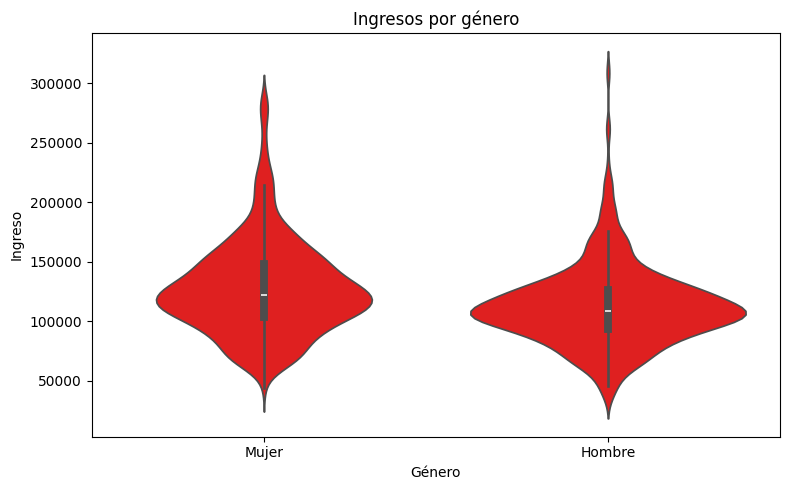

In [31]:
#Ingresos por géneros

plt.figure(figsize=(8,5))
sns.violinplot(x = df["Sex"], y = df["Income"], color="red")

plt.xlabel("Género")
plt.ylabel("Ingreso")
plt.title("Ingresos por género")
plt.xticks([0,1],["Mujer","Hombre"])

plt.tight_layout()
plt.show()


Ambos géneros tienen una distribución similar, pero:

El grupo Hombres tiene una ligera tendencia a tener ingresos más altos, con una mayor concentración en niveles superiores.

El grupo Mujeres parece tener una mayor densidad en niveles de ingreso más bajos o medios.

La línea blanca en el centro muestra la mediana. Para el grupo Mujeres, esta mediana parece un poco más baja.


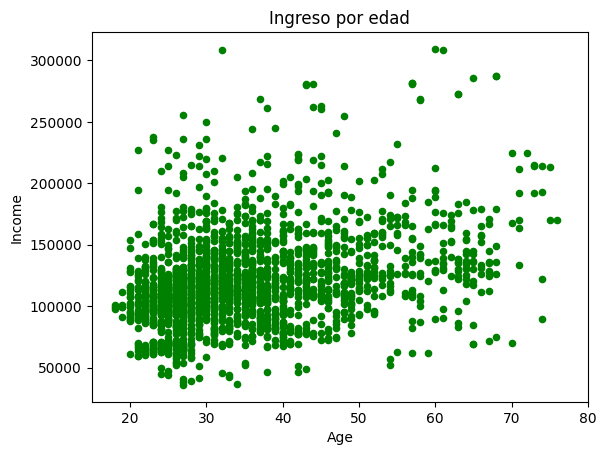

In [32]:
# Ingresos por edad
df.plot(kind="scatter", x ="Age", y ="Income", color="green", title ="Ingreso por edad", xlim=(15,80))
plt.show()

Hay una ligera tendencia positiva: a mayor edad, tiende a aumentar el ingreso (hasta cierto punto).

Sin embargo, la relación no es muy fuerte ni completamente lineal.

La mayor concentración de ingresos está entre los 25 y 45 años, con ingresos entre  90,000 y  150,000.

Hay más dispersión y algunos ingresos elevados (outliers) en personas mayores de 30 años, posiblemente reflejando puestos de mayor jerarquía o experiencia.

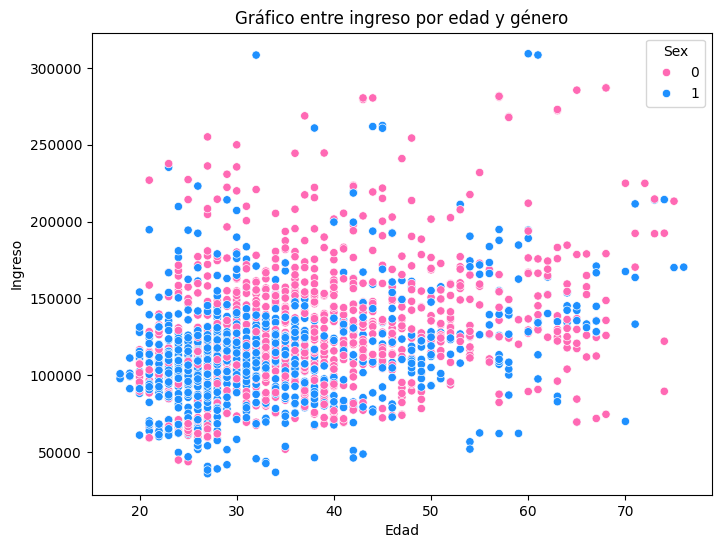

In [36]:
# Diagrama de dispersión para ver la relación entre ingreso por edad y género,
# teniendo en cuenta que 0(Mujer) y 1(Hombre).

# Definir paleta personalizada: 0 = Mujer (rosa), 1 = Hombre (azul)
custom_palette = {0: 'hotpink', 1: 'dodgerblue'}

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Income', data=df, hue='Sex', palette=custom_palette)
plt.title('Gráfico entre ingreso por edad y género')
plt.xlabel('Edad')
plt.ylabel('Ingreso')
plt.show()


A partir de los 40 años, se percibe que los hombres empiezan a tener ingresos más variados y algunos bastante altos en comparación con las mujeres.

Sin embargo, también hay muchos puntos en común, lo que indica que la desigualdad por género no es absoluta, aunque sí visible en los extremos.

El género sí parece influir en los ingresos, especialmente en los niveles más altos.

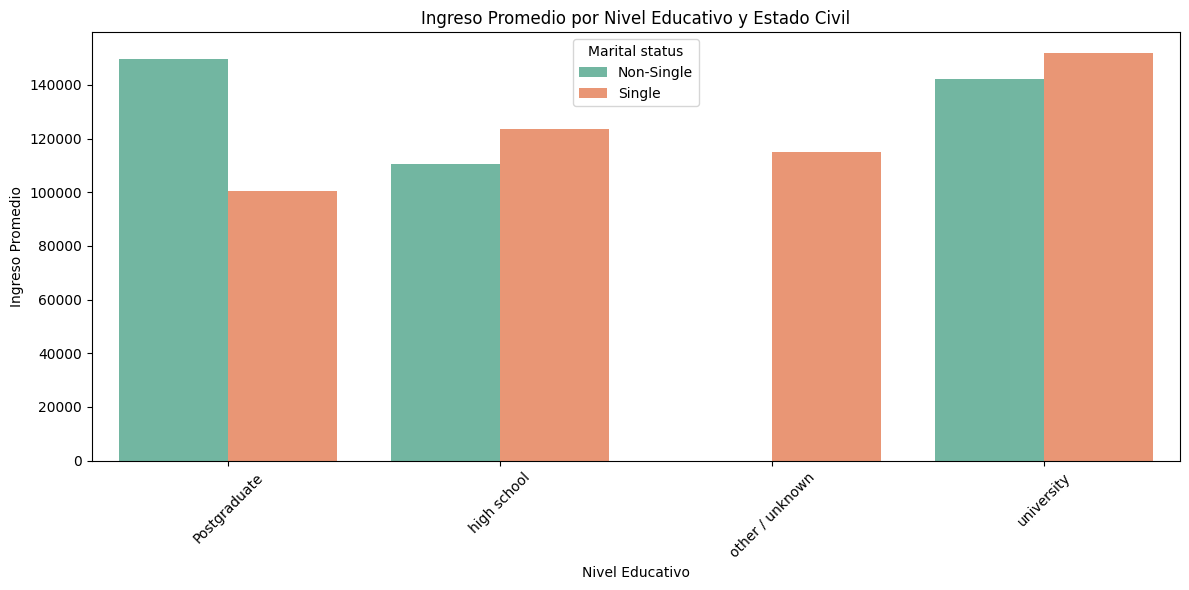

In [37]:
# Agrupamos y calculamos el ingreso promedio por nivel educativo y estado civil.
df_grouped = df.groupby(['Education', 'Marital status'])['Income'].mean().reset_index()

# Creamos el gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x='Education', y='Income', hue='Marital status', data=df_grouped, palette='Set2')

# Etiquetas y título
plt.title('Ingreso Promedio por Nivel Educativo y Estado Civil')
plt.xlabel('Nivel Educativo')
plt.ylabel('Ingreso Promedio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


El nivel educativo está claramente relacionado con mayores ingresos, especialmente en niveles universitarios y de posgrado.

El estado civil influye de forma diferente según el nivel educativo:

En posgrado, ser no soltero está asociado con mayores ingresos.

En niveles menores, los solteros a veces tienen ventaja.

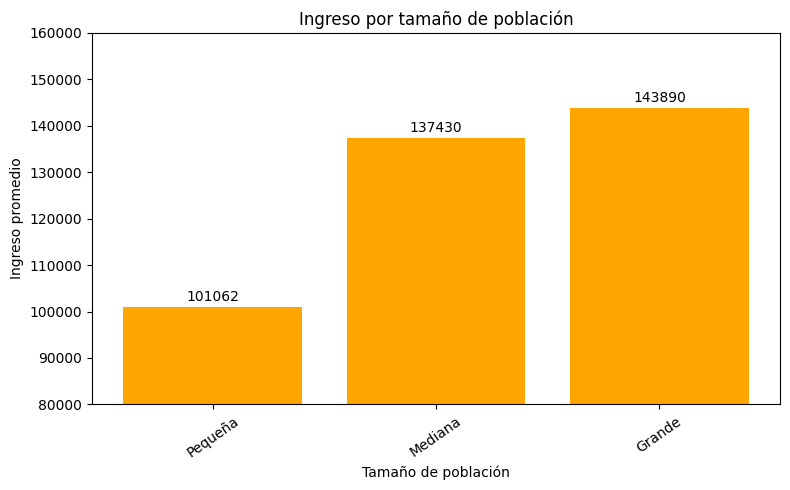

In [38]:
# Ingreso promedio por tipo de asentamiento

# Agrupamos los datos por tipo de asentamiento y calculamos el ingreso promedio
settlement_income = df.groupby("Settlement size")["Income"].mean()

# Etiquetas personalizadas
labels = ["Pequeña", "Mediana", "Grande"]

plt.figure(figsize=(8, 5))
bars = plt.bar(labels, settlement_income, color="orange")

plt.xlabel("Tamaño de población")
plt.ylabel("Ingreso promedio")
plt.title("Ingreso por tamaño de población")

plt.ylim(80000, 160000)
plt.bar_label(bars, padding=2)
plt.xticks(rotation=35)

plt.tight_layout()
plt.show()


Existe una relación positiva entre el tamaño de la población y el ingreso promedio. A medida que aumenta el tamaño de la ciudad, también lo hace el ingreso promedio, lo cual puede estar relacionado con:

Mayor diversidad de empleo

Mayor inversión y desarrollo económico

Costos de vida más altos, compensados por mejores salarios

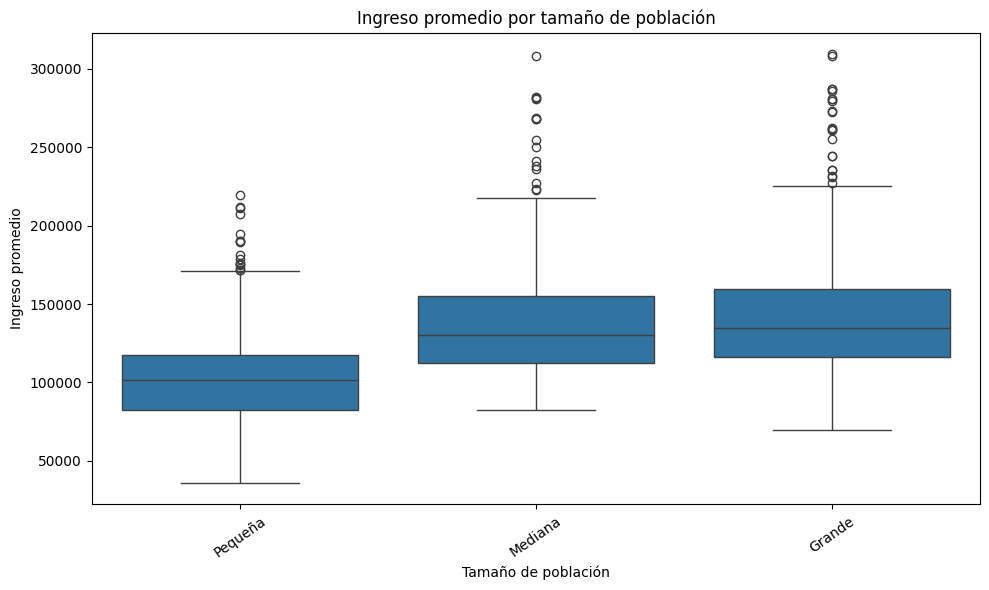

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Settlement size', y='Income', data=df)
plt.xlabel("Tamaño de población")
plt.ylabel("Ingreso promedio")
plt.title("Ingreso promedio por tamaño de población")

# Ajusta etiquetas personalizadas según la cantidad de categorías en el eje x
labels = ["Pequeña", "Mediana", "Grande"]
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=35)

plt.tight_layout()
plt.show()


### **Detectando los outliers utilizando el método IQR**

In [40]:
# Analizaremos las estadisticas descriptivas de la variable Income.
df_ingreso = df["Income"].describe().round(2).reset_index()
df_ingreso

,index,Income
0,count,2000.00
1,mean,120954.42
2,std,38108.82
3,min,35832.00
4,25%,97663.25
5,50%,115548.50
6,75%,138072.25
7,max,309364.00


In [41]:
# como tenemos que el 25% es Q1 y 75% es Q3, reemplazamos los valores
Q1 = 97663.25
Q3 = 138072.25

# Calcular el IQR
IQR = Q3 - Q1
IQR = 138072.25 - 97663.25
print(f" IQR------> {IQR}")

# Calcular límites inferior y superior
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(f" Liite inferior es: ------> {lower_limit}")
print(f" Limite superior es:------> {upper_limit}")


 IQR------> 40409.0
 Liite inferior es: ------> 37049.75
 Limite superior es:------> 198685.75


In [45]:
# Identificar outliers
outliers = df[(df['Income'] < lower_limit) | (df['Income'] > upper_limit)]

# Mostrar los outliers
outliers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
18,1,Non-Single,44,university,261952,Executive / Self-Employed,2
56,0,Single,52,high school,202575,Executive / Self-Employed,2
63,0,Single,25,other / unknown,227385,Skilled Worker,2
87,0,Single,47,high school,241068,Skilled Worker,1
95,0,Single,58,university,268340,Skilled Worker,1
...,...,...,...,...,...,...,...
1076,1,Non-Single,71,Postgraduate,211572,Executive / Self-Employed,1
1092,1,Non-Single,45,university,260847,Executive / Self-Employed,2
1093,0,Single,65,university,285647,Executive / Self-Employed,2
1097,0,Single,57,university,281647,Executive / Self-Employed,1


In [46]:
outliers.isnull().sum()

,0
Sex,0
Marital status,0
Age,0
Education,0
Income,0
Occupation,0
Settlement size,0


### **Analizando los outliers**

In [47]:
outliers1 = outliers.groupby(["Occupation", "Sex","Education"])['Income'].agg(['mean', 'median', 'std', 'min', 'max', 'count']).round()
outliers1


mean    median      std  \
Occupation                Sex Education                                      
Executive / Self-Employed 0   Postgraduate     214364.0  214364.0      NaN   
                              high school      222805.0  219746.0  19339.0   
                              other / unknown  225921.0  222360.0  18723.0   
                              university       248663.0  272314.0  35285.0   
                          1   Postgraduate     213354.0  214126.0   1548.0   
                              high school      247585.0  235417.0  38909.0   
                              university       256584.0  261400.0  38622.0   
Skilled Worker            0   high school      219534.0  218384.0  16715.0   
                              other / unknown  225686.0  227203.0  12045.0   
                              university       268106.0  268106.0    331.0   
                          1   high school      210733.0  210733.0   4909.0   
                              university       199682.0  199682.0     40.0   
Unskilled / Unemployed    1   high school       36296.0   36296.0    656.0   

                                                  min     max  count  
Occupation                Sex Education                               
Executive / Self-Employed 0   Postgraduate     214364  214364      1  
                              high school      201656  268906     18  
                              other / unknown  200621  255198      9  
                              university       202997  287247     21  
                          1   Postgraduate     211572  214364      3  
                              high school      209856  308491      5  
                              university       211229  309364      8  
Skilled Worker            0   high school      200298  241068      4  
                              other / unknown  204723  237799      6  
                              university       267872  268340      2  
                          1   high school      207262  214204      2  
                              university       199654  199711      2  
Unskilled / Unemployed    1   high school       35832   36760      2

Disparidad de género: En general, los hombres(1) tienen mayor representación y una varianza menor en los ingresos, mientras que las mujeres(0) presentan mayores desviaciones, lo que sugiere presencia de outliers o desigualdad interna.

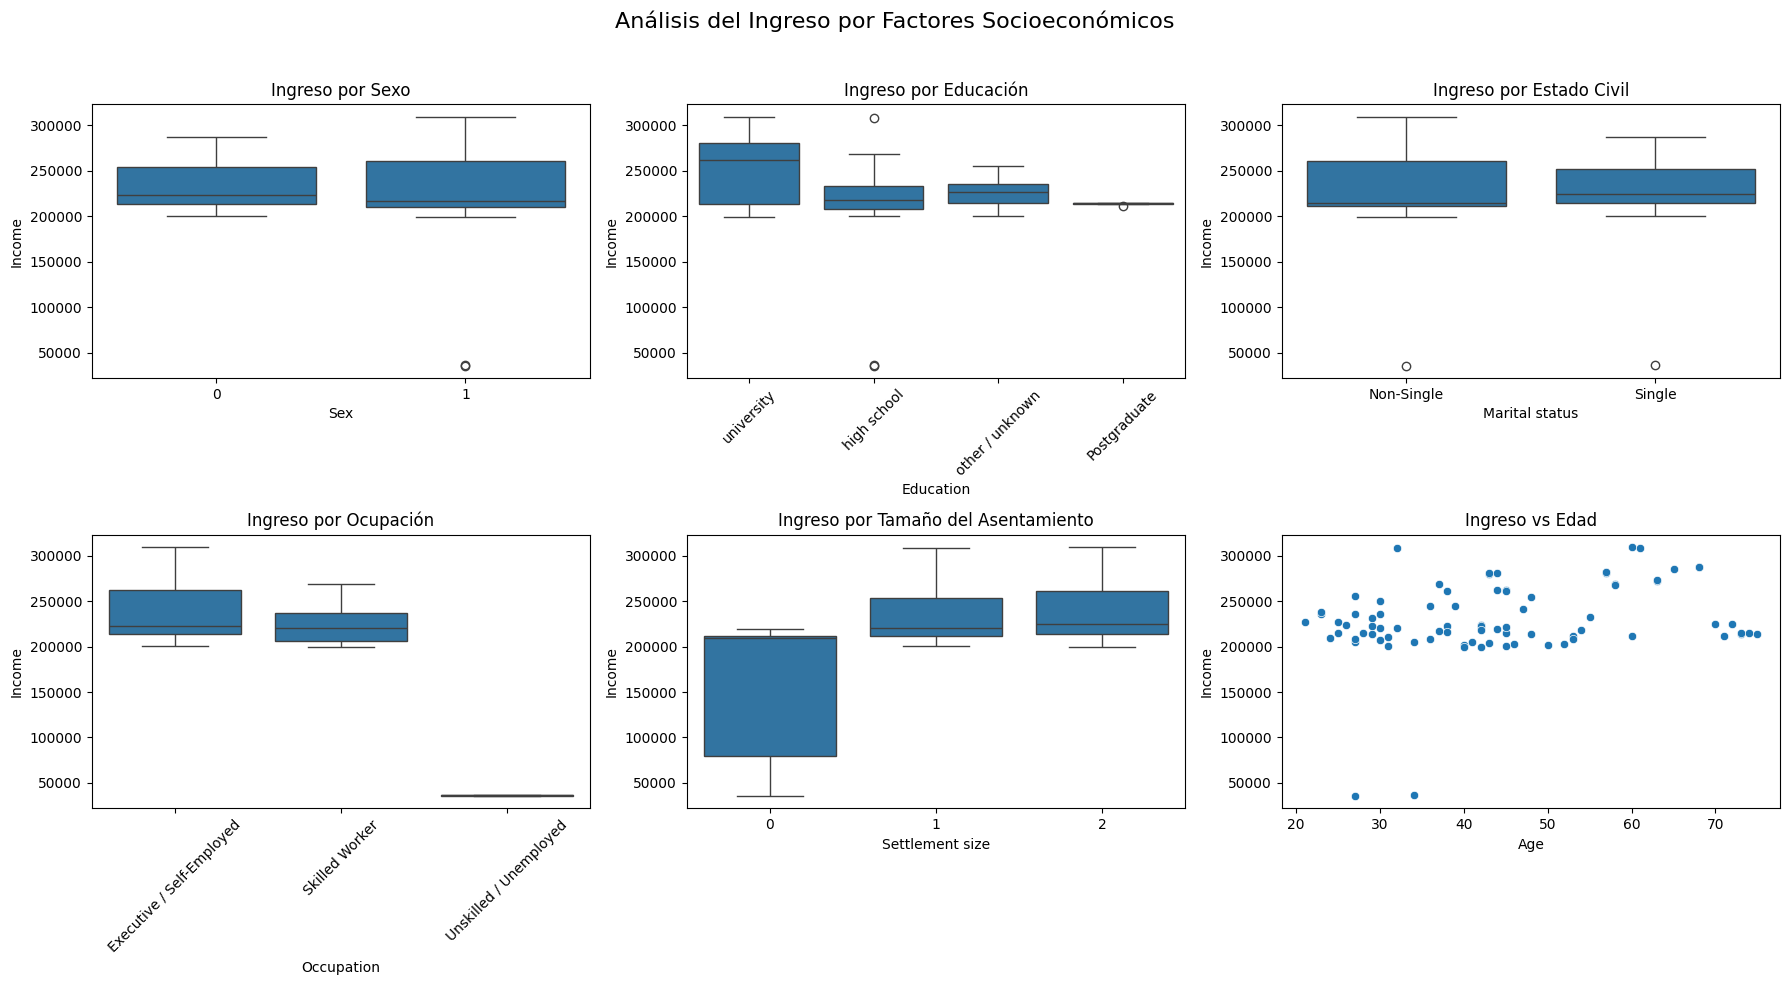

In [49]:
# Crearemos una figura con 6 subplots (2 filas, 3 columnas), donde analizaremos los outliers
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Análisis del Ingreso por Factores Socioeconómicos", fontsize=16)

# Subplot 1: Ingreso por sexo
sns.boxplot(x='Sex', y='Income', data=outliers, ax=axs[0, 0])
axs[0, 0].set_title("Ingreso por Sexo")

# Subplot 2: Ingreso por nivel educativo
sns.boxplot(x='Education', y='Income', data=outliers, ax=axs[0, 1])
axs[0, 1].set_title("Ingreso por Educación")
axs[0, 1].tick_params(axis='x', rotation=45)

# Subplot 3: Ingreso por estado civil
sns.boxplot(x='Marital status', y='Income', data=outliers, ax=axs[0, 2])
axs[0, 2].set_title("Ingreso por Estado Civil")

# Subplot 4: Ingreso por ocupación
sns.boxplot(x='Occupation', y='Income', data=outliers, ax=axs[1, 0])
axs[1, 0].set_title("Ingreso por Ocupación")
axs[1, 0].tick_params(axis='x', rotation=45)

# Subplot 5: Ingreso por tamaño del asentamiento
sns.boxplot(x='Settlement size', y='Income', data=outliers, ax=axs[1, 1])
axs[1, 1].set_title("Ingreso por Tamaño del Asentamiento")

# Subplot 6: Dispersión ingreso vs edad
sns.scatterplot(x='Age', y='Income', data=outliers, ax=axs[1, 2])
axs[1, 2].set_title("Ingreso vs Edad")

# Ajuste del diseño
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Hay outliers bajos en casi todos los factores: sexo, educación, estado civil, ocupación, zona y edad.

Esos outliers parecen concentrarse más en:

- Hombres

- Solteros

- Personas con educación desconocida o secundaria

- Personas en asentamientos pequeños

- Trabajadores no calificados

Esto sugiere que los factores estructurales y socioeconómicos influyen significativamente en la probabilidad de que alguien tenga ingresos mucho más bajos que el promedio.

# **Conclusiones generales**
### **Exploración y Análisis Descriptivo**

El análisis reveló diferencias claras en los ingresos según factores sociodemográficos. Las ocupaciones especializadas y un mayor nivel educativo se asocian con ingresos más altos. También se detectó una brecha salarial de género, con los hombres ganando más en promedio. Además, quienes viven en zonas urbanas grandes tienden a percibir mayores ingresos. Estos hallazgos reflejan desigualdades estructurales que deben considerarse al proponer soluciones.

En conjunto, estos resultados reflejan la existencia de desigualdades económicas vinculadas a factores estructurales y sociales, lo cual debe ser considerado tanto en la interpretación de los datos como en la formulación de políticas públicas orientadas a reducir dichas brechas.